In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import image
from sklearn import svm
from sklearn.metrics import accuracy_score
import os
from skimage import io,color, transform
import numpy as np

In [9]:
def load_images(folder):
    image_list=[]
    label_list=[]
    for category in os.listdir(folder):
        for filename in os.listdir(os.path.join(folder,category)):
            img= io.imread(os.path.join(folder,category,filename))
            img= transform.resize(img,(100,100),mode='reflect')
            if img.ndim == 3:  # Check if the image is RGB
                img_gray = color.rgb2gray(img)
            else:
                img_gray = img  # Grayscale images don't need rgb2gray
            
            image_list.append(img_gray.flatten())
            label_list.append(category)
        
    return np.array(image_list),np.array(label_list)

In [10]:
train_folder = r'dataset\test'
test_folder = r'dataset\train'

In [11]:
X_train,y_train= load_images(train_folder)
X_test,y_test= load_images(test_folder)

In [43]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [44]:
model=svm.SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred=model.predict(X_val)
accuracy = accuracy_score(y_val,y_pred)

In [66]:
print("The Prediction Accuracy Score is : ",accuracy*100,"%")

The Prediction Accuracy Score is :  75.0 %


In [63]:
def display_and_predict(model, image_path):
    def load_and_preprocess_image(file_path):
        img = io.imread(file_path)
        img = transform.resize(img, (100, 100), mode='reflect')
        img_gray = color.rgb2gray(img)
        return img_gray.flatten().reshape(1, -1)

    test_image = load_and_preprocess_image(image_path)

    prediction = model.predict(test_image)
    predicted_class = prediction[0]

    original_image = io.imread(image_path)
    plt.imshow(original_image)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.show()

    return predicted_class

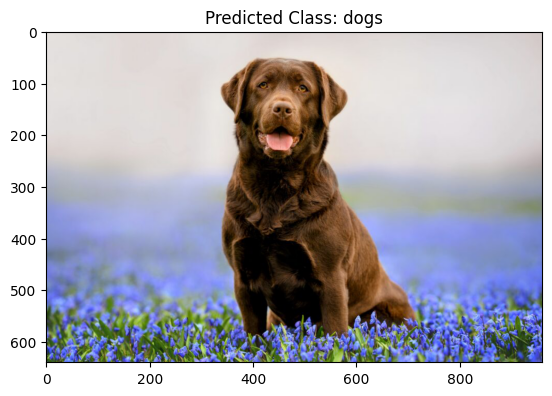

In [64]:
image_path = r"C:\Users\aashi\OneDrive\Desktop\best-guard-dogs-1650302456.jpeg"
predicted_class = display_and_predict(model, image_path)

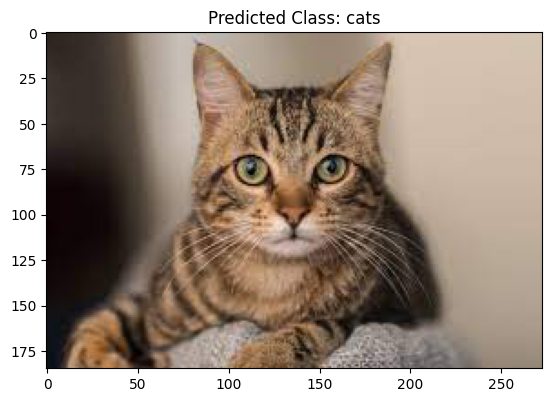

In [67]:
image_path = r"C:\Users\aashi\OneDrive\Desktop\cat.jpeg"
predicted_class = display_and_predict(model, image_path)